In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [34]:
def cubic_spline(x, y):
    assert x.shape[0] == y.shape[0]
    n_knots = x.shape[0] - 1
    h = t[1:(n_knots + 1)] - t[:n_knots]
    b = (y[1:(n_knots + 1)] - y[:n_knots]) / h
    v = 2 * (h[:(n_knots - 1)] + h[1:n_knots])
    u = 6 * (b[1:n_knots] - b[:(n_knots - 1)])
    lhs = np.diag(v)
    lhs[np.arange(1, (n_knots - 1)), np.arange(n_knots - 2)] = h[1:(n_knots - 1)]
    lhs[np.arange(n_knots - 2), np.arange(1, (n_knots - 1))] = h[1:(n_knots - 1)]
    Z = np.linalg.solve(lhs, u)
    Z = np.r_[[0], Z, [0]]
    plt.scatter(t, y)
    for i in range(N):
        xx = np.linspace(t[i], t[i + 1], 100)
        si = Z[i + 1] * (xx - t[i]) ** 3 + Z[i] * (t[i + 1] - xx) ** 3
        si /= (6 * h[i])
        si += (y[i + 1] / h[i] - Z[i + 1] / 6 * h[i]) * (xx - t[i])
        si += (y[i] / h[i] - h[i] * Z[i] / 6) * (t[i + 1] - xx)
        plt.plot(xx, si)
    return h, b, v, u, lhs, Z

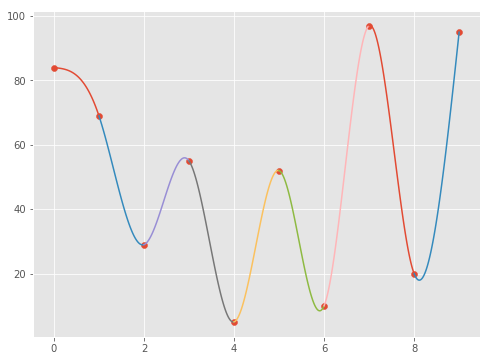

In [36]:
plt.figure(figsize=(8, 6))
_ = cubic_spline(np.arange(10), np.random.randint(0, 100, (10,)))

## Good splines, bad splines, you know I've had my share